# <font color='#15B01A'> **Energy Generation, Consumption and Weather Visualization for Spain**</font>

### Tasks Worked On

* Data reading and cleaning
* Statistical description
* Application of preprocessing techniques
* Visualizations
* Confirmation about visualizations answering project questions
* Discussions and conclusions

### Problem Statements
The datasets for the visualization obtained from [Kaggle](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=weather_features.csv) considered energy and weather of five cities in Spain namely Barcelona, Bilbao, Madrid, Seville, and Valencia. The problem statements of interest are to seek answers to the following.

1. What are the energy prices and demand levels from 2014 to 2018 and the ability of forecast results to be a good representation of actual results?
2. The humidity and temperature levels of the cities within spain and the type of weather the cities could experience.
3. The types of energy generating sources in Spain and their production energy quantities.
4. What quantity of energy generating sources in Spain are considered renewable.
5. To seasonally understand energy price changes by discovering how energy prices quarterly change in Spain.


### Target Audience
The target audience for this project is the native people of Spain to allow them to gain an understanding of their energy consumption and generation, as well as giving them insights to how weather has acted from 2014 to 2018. Furthermore, this project is suitable for anyone who may have an interest in energy consumption and generation, as well as trends in weather.

###  Reasons for The Chosen Visualization Tool for The problem
The chosen tool for visualization is to use jupyter notebook. By using jupyter notebook, we are able to use python and its useful visualization libraries such as matplotlib.pyplot to visualize the energy and weather dataset. 
Through visualization, the following are achieved.
1. To provide alternative views of the energy and weather datasets for the project and describe some structures, patterns or anomalies in the datasets.
2. To assist in decsion-making and provide a mechanism for communicating information to people in an efficient and effective manner.
3. To educate our target audience on the processes and concepts that affect everyday life from energy usage and its generation.

# <font color=#FFA500> **1-Data Reading, Cleaning and Preprocessing** </font>

In [1]:
# Packages (libraries) to import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline

In [2]:
# Obtaining the energy and weather datasets

notclean_energy = pd.read_csv("energy_dataset.csv", na_values=['?','NA','--','n/a'])
notclean_weather = pd.read_csv("weather_features.csv", na_values=['?','NA','--','n/a'])

In [3]:
# Shape (number of rows and columns) of the energy and weather datasets before cleaning

print('Energy data shape before cleaning:', notclean_energy.shape)
print('Weather data shape before cleaning:', notclean_weather.shape)

Energy data shape before cleaning: (35064, 29)
Weather data shape before cleaning: (178396, 17)


In [4]:
# Checking missing values in the energy dataset

notclean_energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [5]:
# Calculating the percentage of missing values in each column
# Columns with 20% or more missing values are dropped

notclean_energy.isnull().sum()/notclean_energy.shape[0]

time                                           0.000000
generation biomass                             0.000542
generation fossil brown coal/lignite           0.000513
generation fossil coal-derived gas             0.000513
generation fossil gas                          0.000513
generation fossil hard coal                    0.000513
generation fossil oil                          0.000542
generation fossil oil shale                    0.000513
generation fossil peat                         0.000513
generation geothermal                          0.000513
generation hydro pumped storage aggregated     1.000000
generation hydro pumped storage consumption    0.000542
generation hydro run-of-river and poundage     0.000542
generation hydro water reservoir               0.000513
generation marine                              0.000542
generation nuclear                             0.000485
generation other                               0.000513
generation other renewable                     0

In [6]:
'''
Two columns are dropped because they have a high percentage of missing values. 100% (more than 20%) of the generation 
hydro pumped storage aggregated and the forecast wind offshore eday ahead columns are missing so they are dropped.
'''

nRows = notclean_energy.shape[0]

notclean_energy_dropped_col = notclean_energy.dropna(axis='columns', thresh=int(0.80*nRows))
print('Energy data shape after dropping columns:', notclean_energy_dropped_col.shape)

Energy data shape after dropping columns: (35064, 27)


In [7]:
# Checking the number of missing values in each column of the energy dataset

notclean_energy_dropped_col.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [8]:
# All rows with missing values are dropped

missingValuesRowMask_energy = notclean_energy_dropped_col.isnull().any(axis=1)==False

clean_energy = notclean_energy_dropped_col[missingValuesRowMask_energy]

print('Energy data shape after dropping rows with missing values:', clean_energy.shape)

Energy data shape after dropping rows with missing values: (35017, 27)


In [9]:
# Confirmation that there are no missing values in the energy dataset

clean_energy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [10]:
# Checking missing values in the weather dataset

notclean_weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [11]:
# Storing the clean weather dataset and confirming that there are no missing values in the weather dataset

clean_weather = notclean_weather

clean_weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [12]:
# Checking the data types to identify if the variable of a data type must be changed

print('Data Types of the Energy Dataset:\n', clean_energy.dtypes)

print('\nData Types of the Weather Dataset:\n', clean_weather.dtypes)

Data Types of the Energy Dataset:
 time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar              

In [13]:
# Changing the data type of time and dt_iso in the energy and weather datasets respectively from object to datetime64 

clean_energy['time'] = pd.to_datetime(clean_energy['time'], utc=True)
clean_weather['dt_iso'] = pd.to_datetime(clean_weather['dt_iso'], utc=True)

C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/1087138170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_energy['time'] = pd.to_datetime(clean_energy['time'], utc=True)


## Meaning of Each Attribute for The Energy Dataset


Attributes | Meaning | Attribute type | Relevance of Attribute in Visualization
------- |-------| ----- | --------
time | Datatime index localized to CET | datetime64[ns,utc] | Yes
generation biomass | Biomass generation in megawatt (MW) | float64 | Yes
generation fossil brown coal/lignite | Coal/lignite generation in megawatt (MW) | float64  | Yes
generation fossil coal-derived gas | Coal gas generation in megawatt (MW) | float64  | No
generation fossil gas | Gas generation in megawatt (MW) | float64 | Yes
generation fossil hard coal | Coal generation in megawatt (MW) | float64 | Yes
generation fossil oil | Oil generation in megawatt (MW) | float64 | Yes
generation fossil oil shale | Shale oil generation in megawatt (MW) | float64 | No
generation fossil | Peat generation in megawatt (MW) | float64 | No
generation geothermal | Geothermal generation in megawatt (MW) | float64 | No
generation hydro pumped storage aggregated | Hydro1 generation in megawatt (MW) | float64 | No
generation hydro pumped storage consumption | Hydro2 generation in megawatt (MW) | float64 | Yes
generation hydro run-of-river and poundage | Hydro3 generation in megawatt (MW) | float64 | Yes
generation hydro water reservoir | Hydro4 generation in megawatt (MW) | float64 | Yes
generation marine | Sea generation in megawatt (MW) | float64 | No
generation nuclear | Nuclear generation in megawatt (MW) | float64 | Yes
generation other | Other generation in megawatt (MW) | float64 | Yes
generation other renewable | Other renewable generation in megawatt (MW) | float64 | Yes
generation solar | Solar generation in megawatt (MW) | float64 | Yes
generation waste | Waste generation in megawatt (MW) | float64 | Yes
generation wind offshore | Wind offshore generation in megawatt (MW) | float64 | No
generation wind onshore | Wind onshore generation in megawatt (MW) | float64 | Yes
forecast solar day ahead | Forecasted solar generation | float64 | No
forecast wind offshore eday ahead | Forecasted offshore wind generation | float64 | No
forecast wind onshore day ahead | Forecasted onshore wind generation | float64 | No
total load forecast | Forecasted electrical demand | float64 | Yes
total load actual | Actual electrical demand | float64 | Yes
price day ahead | Forecasted price EUR/MWh | float64 | Yes
price actual | Price in EUR/MWh | float64 | Yes

## Meaning of Each Attribute for The Weather Dataset


Attributes | Meaning | Attribute type | Relevance of Attribute in Visualization
------- |-------| ----- | --------
dt_iso | Datatime index localized to CET | datetime64[ns,utc] | Yes
city_name | Name of city | object | Yes
temp | Temperature in Kelvin (K) | float64 | Yes
temp_min | Temperature in Kelvin (K) | float64  | No
temp_max | Temperature in Kelvin (K) | float64  | No
pressure | Pessure in hectoPascals (hPa) | int64 | No
humidity | Humidity in percentage (%) | int64  | Yes
wind_speed | Wind speed in meter per second (m/s) | int64  | Yes
wind_deg | Wind direction | int64  | Yes
rain_1h | Rain in last hour in millimeters (mm) | float64   | No
rain_3h | Rain in last 3 hours in millimeters (mm) | float64   | No
snow_3h | Snow in last 3 hours in millimeters (mm) | float64   | No
clouds_all | Cloud cover in percentage (%) | int64 | No
weather_id | Code used to describe weather | object | No
weather_main | Short description of current weather | object | Yes
weather_description | Long description of current weather | object | No
weather_icon | Weather icon code for website | object | No

In [14]:
# Confirmation that the data types associated to time have been changed

print('Data Types of Energy Dataset After Data Type Change:\n', clean_energy.dtypes)

print('\nData Types of Weather Dataset After Data Type Change:\n', clean_weather.dtypes)


Data Types of Energy Dataset After Data Type Change:
 time                                           datetime64[ns, UTC]
generation biomass                                         float64
generation fossil brown coal/lignite                       float64
generation fossil coal-derived gas                         float64
generation fossil gas                                      float64
generation fossil hard coal                                float64
generation fossil oil                                      float64
generation fossil oil shale                                float64
generation fossil peat                                     float64
generation geothermal                                      float64
generation hydro pumped storage consumption                float64
generation hydro run-of-river and poundage                 float64
generation hydro water reservoir                           float64
generation marine                                          float64
generati

In [15]:
# Slicing columns of interest from the energy and weather dataset for visualization

weather_series = pd.Series(clean_weather.columns.tolist())
weather_col_index = [0,1,2,6,7,8,14]
weather_col_selected = list(weather_series[weather_col_index])

energy_series = pd.Series(clean_energy.columns.tolist())
energy_col_index = [0,1,2,4,5,6,10,11,12,14,15,16,17,18,20,23,24,25,26]
energy_col_selected = list(energy_series[energy_col_index])

clean_weather_use = clean_weather[weather_col_selected]
clean_energy_use = clean_energy[energy_col_selected]


In [16]:
# The unit of temperature in the weather dataset is in Kelvin. A conversion is done from Kelvin to Fahrenheit

clean_weather_use['temp'] = 1.8 * (clean_weather.loc[:,'temp']-273) + 32

C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/2641789951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_weather_use['temp'] = 1.8 * (clean_weather.loc[:,'temp']-273) + 32


### <font color=#069AF3> **1.1-Reason for The Preprocessing Technique** </font>

Preprocessing techniques were used to further clean the energy and weather datasets. The energy dataset had missing values in specific rows and columns. To deal with the missing values in the columns, the percentage of missing values in each column was calculated and a rule of dropping all columns that had 20% or more missing values was used. Two columns were dropped from energy dataset because 100% of the values in the columns were missing. Also, to deal with missing values in the rows, all rows which had missing values were dropped. Dropping the rows and columns with missing values did not change the representation of the dataset.

Moreover, not all attributes in both datasets were of relevance to the visulaization process. As a result, specific attributes from the energy and weather datasets were sliced for meaningful visualization.

Also, as a preprocessing technique, the price and demand from the energy dataset was normalized to ensure consistency within the chart and for the chart to handle the data.

# <font color=#FFA500> **2-Dataset Statistical Description and Visualization** </font>

### <font color=#069AF3> **2.1-Dataset Statistical Description** </font>

In [17]:
# Descriptive statistics for the weather dataset of interest

clean_weather_use.describe()

,temp,humidity,wind_speed,wind_deg
count,178396.000000,178396.000000,178396.00000,178396.000000
mean,61.913489,68.423457,2.47056,166.591190
std,14.447159,21.902888,2.09591,116.611927
min,12.632000,0.000000,0.00000,0.000000
25%,51.206000,53.000000,1.00000,55.000000
50%,61.070000,72.000000,2.00000,177.000000
75%,71.870000,87.000000,4.00000,270.000000
max,108.680000,100.000000,133.00000,360.000000


In [18]:
# Descriptive statistics for the energy datasets of interest

clean_energy_use.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load forecast,total load actual,price day ahead,price actual
count,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000
mean,383.529800,448.103207,5622.411829,4255.571694,298.333095,475.726047,972.090956,2604.536168,6264.056687,60.237256,85.651141,1433.093669,269.501299,5466.078048,28710.977697,28696.840078,49.869153,57.887179
std,85.304489,354.605379,2202.018147,1961.428697,52.470724,792.553651,400.753545,1834.944644,838.260925,20.236345,14.063909,1680.331016,50.143711,3213.624333,4592.401419,4574.238252,14.618269,14.190275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24795.000000,24808.000000,41.490000,49.360000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28905.000000,28902.000000,50.510000,58.020000
75%,433.000000,757.000000,6428.000000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2579.000000,310.000000,7399.000000,32263.000000,32192.000000,60.530000,68.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41390.000000,41015.000000,101.990000,116.800000


In [19]:
# Correlation of the weather dataset of interest

clean_weather_use.corr()

,temp,humidity,wind_speed,wind_deg
temp,1.000000,-0.573542,0.115307,-0.052199
humidity,-0.573542,1.000000,-0.250336,-0.029316
wind_speed,0.115307,-0.250336,1.000000,0.261888
wind_deg,-0.052199,-0.029316,0.261888,1.000000


In [20]:
# Correlation of the energy dataset of interest

clean_energy_use.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229608,-0.021187,0.433113,0.458499,-0.044836,-0.285804,-0.034102,-0.023269,0.658608,-0.563450,-0.005010,-0.348220,-0.069010,0.085351,0.083211,0.108867,0.142799
generation fossil brown coal/lignite,0.229608,1.000000,0.500119,0.768905,0.314732,-0.323907,-0.525184,-0.229371,-0.008795,0.097381,0.104013,0.040535,0.282625,-0.434509,0.278777,0.280531,0.568146,0.364206
generation fossil gas,-0.021187,0.500119,1.000000,0.542141,0.310711,-0.420602,-0.271238,0.060461,-0.112049,-0.065878,0.336101,0.074938,0.276167,-0.397280,0.543711,0.548947,0.640889,0.461918
generation fossil hard coal,0.433113,0.768905,0.542141,1.000000,0.440374,-0.406085,-0.498581,-0.158107,-0.025069,0.264419,-0.020198,0.046091,0.170160,-0.442063,0.394443,0.396637,0.671667,0.466703
generation fossil oil,0.458499,0.314732,0.310711,0.440374,1.000000,-0.331405,-0.107619,0.160220,0.013163,0.374703,-0.117448,0.099879,-0.177810,-0.052254,0.499435,0.497069,0.293068,0.285351
generation hydro pumped storage consumption,-0.044836,-0.323907,-0.420602,-0.406085,-0.331405,1.000000,0.053081,-0.234372,0.013061,0.021289,-0.268075,-0.214677,-0.188762,0.389000,-0.559710,-0.562790,-0.600351,-0.427032
generation hydro run-of-river and poundage,-0.285804,-0.525184,-0.271238,-0.498581,-0.107619,0.053081,1.000000,0.652604,-0.125676,-0.127777,0.053104,0.039457,-0.286875,0.223133,0.120728,0.118587,-0.294703,-0.136752
generation hydro water reservoir,-0.034102,-0.229371,0.060461,-0.158107,0.160220,-0.234372,0.652604,1.000000,-0.050910,0.065153,-0.065858,0.091796,-0.288595,-0.019229,0.476733,0.479489,-0.017820,0.072210
generation nuclear,-0.023269,-0.008795,-0.112049,-0.025069,0.013163,0.013061,-0.125676,-0.050910,1.000000,0.040392,-0.065065,0.003860,0.084965,0.048804,0.090389,0.085598,-0.043937,-0.051817
generation other,0.658608,0.097381,-0.065878,0.264419,0.374703,0.021289,-0.127777,0.065153,0.040392,1.000000,-0.445720,-0.016687,-0.362431,0.047058,0.101596,0.100666,0.043950,0.099759


### <font color=#069AF3> **2.2-Statistical Visuals** </font>

Weather Correlation


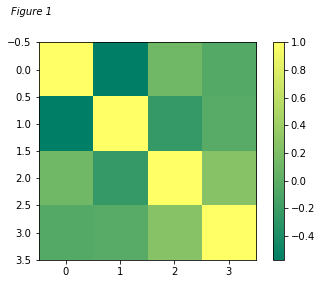


Energy Correlation


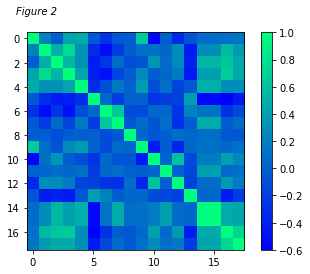

In [21]:
# Visualizing the correlation of the weather and energy datasets of interest 

print('Weather Correlation')
plt.imshow(clean_weather_use.corr(), cmap='summer')
plt.colorbar() 
plt.text(-1.0, -1.0, 'Figure 1', style='italic')
plt.show()

print('\nEnergy Correlation')
plt.imshow(clean_energy_use.corr(), cmap='winter')
plt.colorbar()
plt.text(-1.4, -2.0, 'Figure 2', style='italic')
plt.show()

C:\Users\Kenneth Dei-Amoah\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


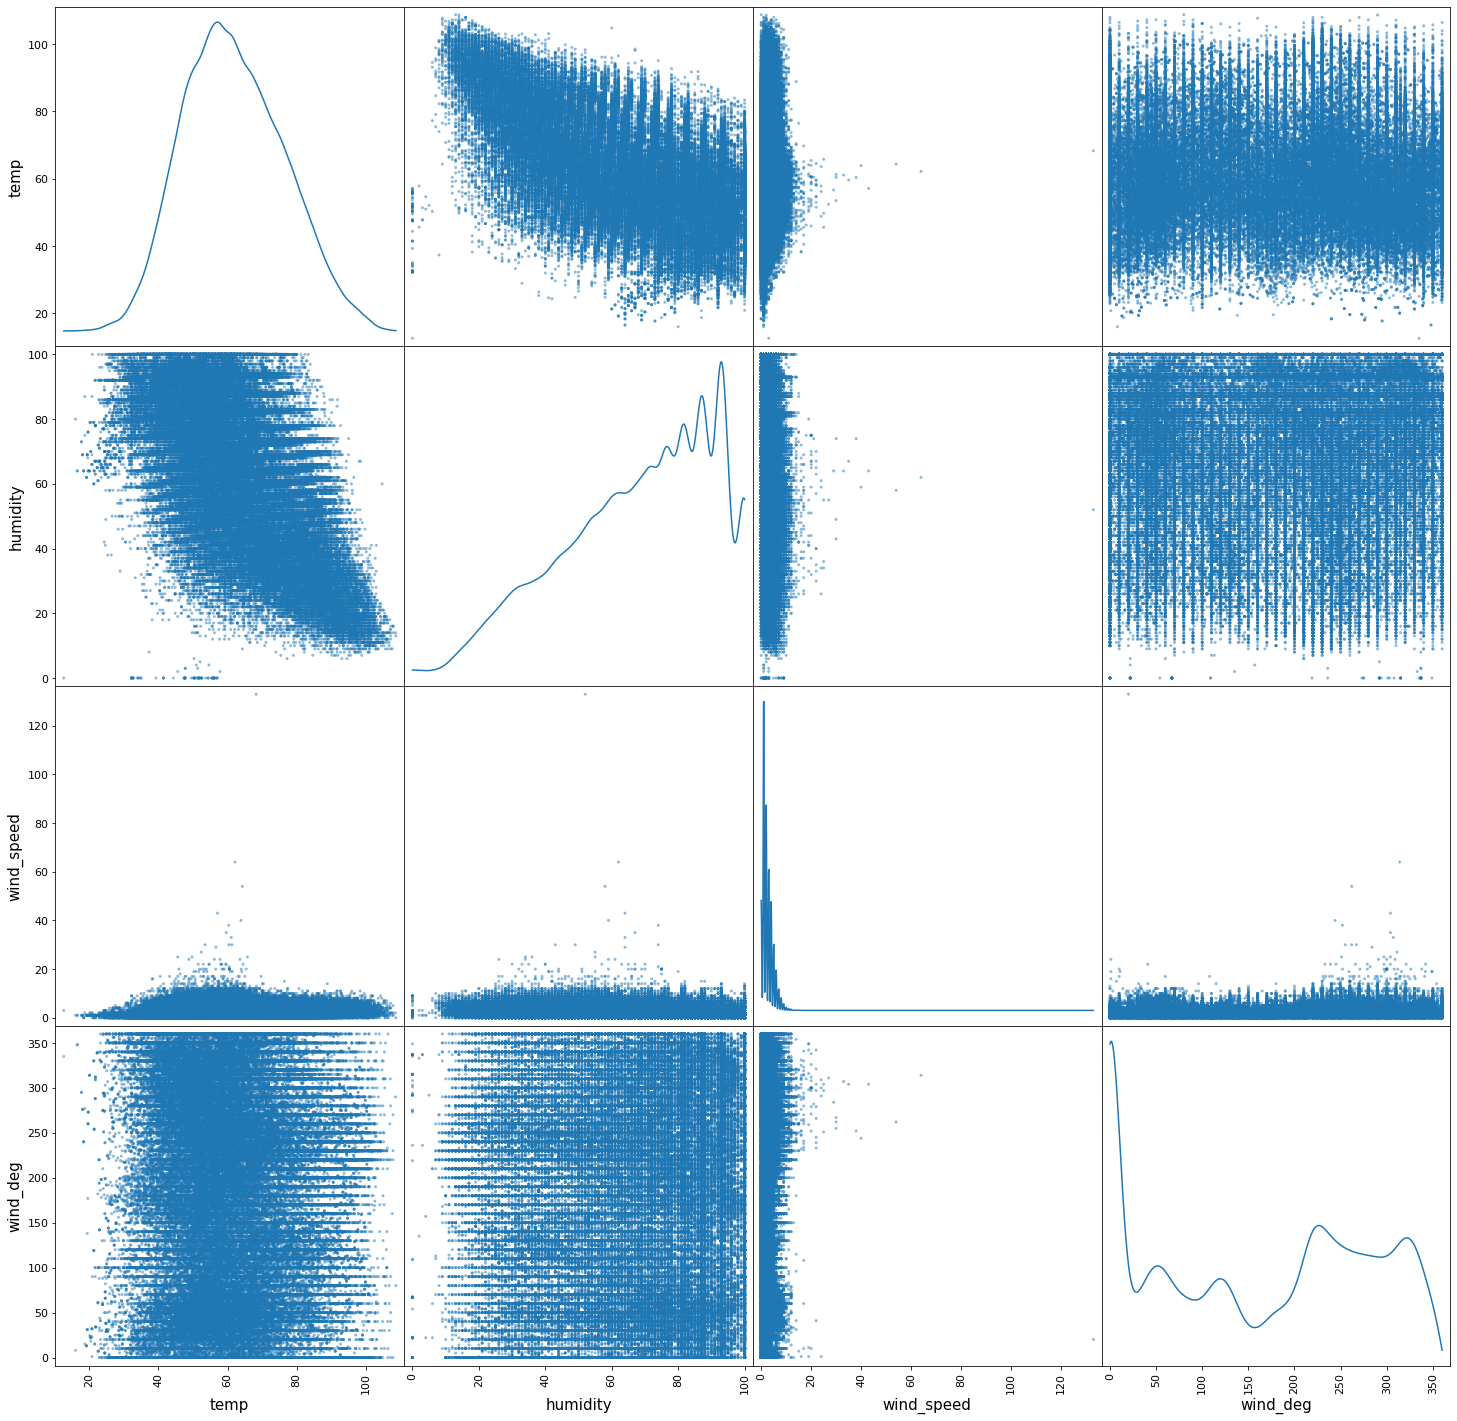

In [22]:
# Scatter matrix of the weather dataset of interest

axes1 = pd.plotting.scatter_matrix(clean_weather_use, figsize=(25, 25),diagonal='kde')

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 11) for item in axes1.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 11) for item in axes1.ravel()]

[plt.setp(item.yaxis.get_label(), 'size', 15) for item in axes1.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in axes1.ravel()]

plt.show()

C:\Users\Kenneth Dei-Amoah\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


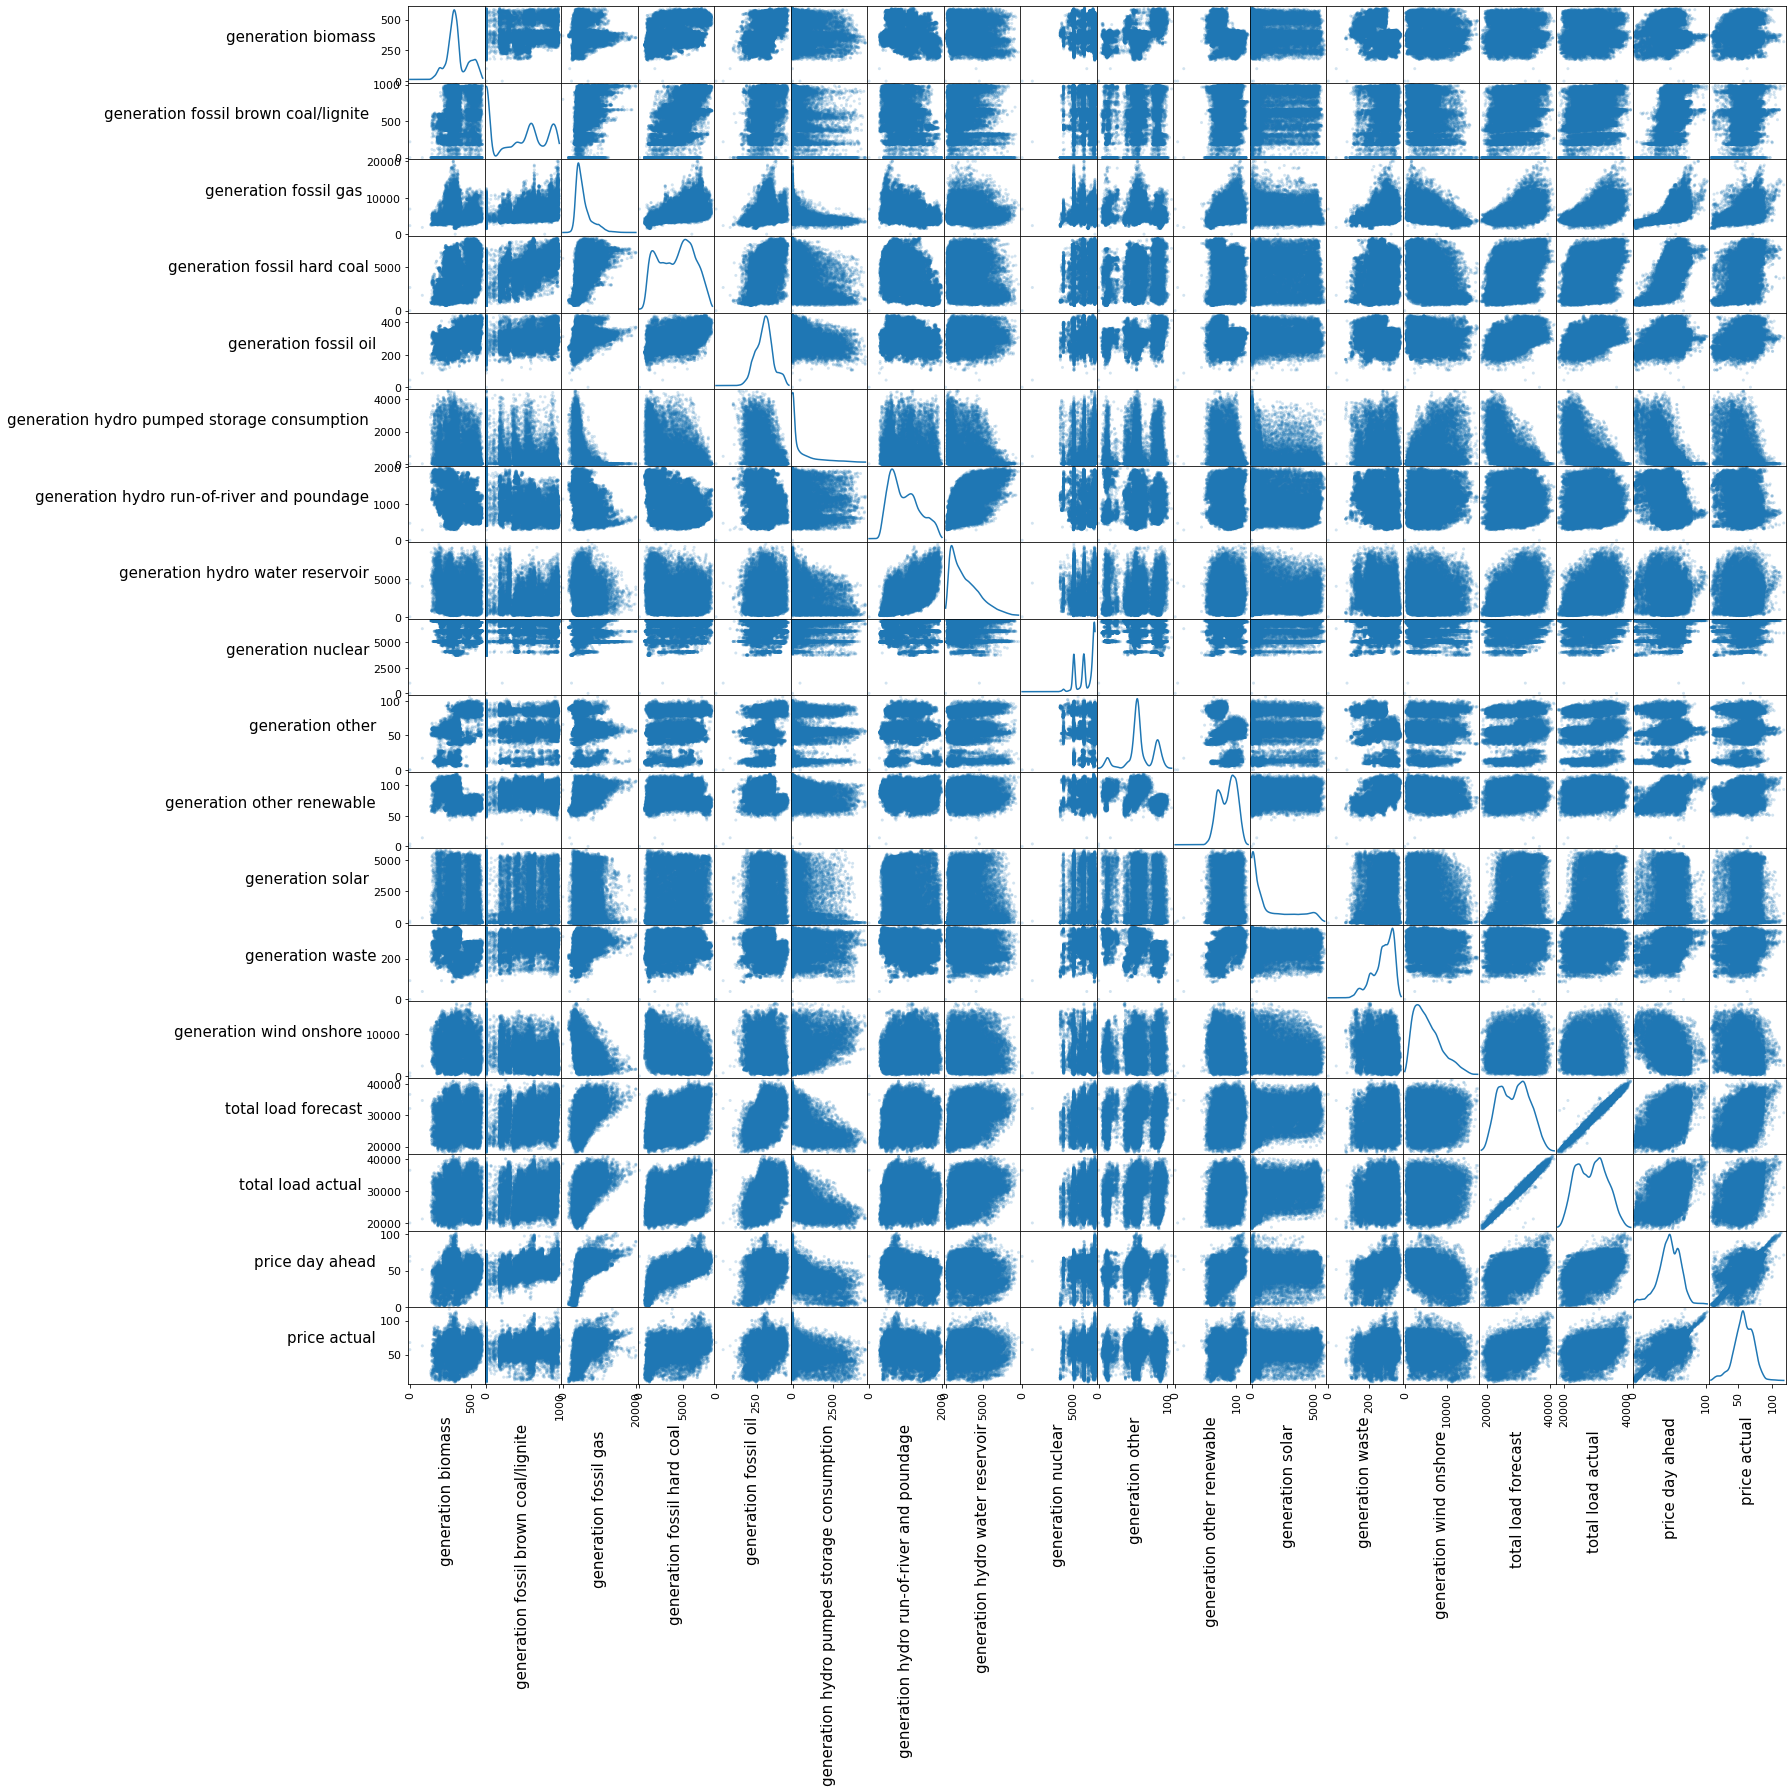

In [23]:
# Scatter matrix of energy dataset of interest

axes2 = pd.plotting.scatter_matrix(clean_energy_use, figsize=(25, 25), diagonal='kde', alpha=0.2)

for ax in axes2.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 11) for item in axes2.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 11) for item in axes2.ravel()]

[plt.setp(item.yaxis.get_label(), 'size', 15) for item in axes2.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in axes2.ravel()]
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)

plt.show()

# <font color=#FFA500> **3-Analysis of the Data Statistics** </font>

### <font color=#069AF3> **3.1-Data Statistics for The Weather Dataset** </font>
From the weather dataset, wind direction has the higest average of 166.59 and wind speed has the lowest average of 2.47. Also, wind direction has the largest variability of 116.61 and wind speed has the lowest variability of 2.10.
Temperature and humidity have their data points further from mean. Hence, there is a higher deviation within the datasets of these two columns.

There is a low to moderate relationship between selected attributes of the weather dataset for visualization. It is observed from figure 1 that the darker green a portion of the chart becomes, the lower the correlation between the pairwise data. Otherwise, the lighter green to yellow the portion of the chart becomes, the higher the correlation between the pairwise data.

### <font color=#069AF3> **3.2-Data Statistics for The Energy Dataset** </font>
From the energy dataset, a larger number of atrributes have a high variability. Total actual load has the largest variability and generation other renewable has the lowest variability. Total load forecast has the greatest average and price actual has the least average.

Figure 2 shows that as the color of the chart becomes dark blue, there is a moderative negative relationship between pairwise data from the energy dataset. As the color gets closer to green, the stronger the positive correlation between pairwise data.


# <font color=#FFA500> **4-Visualizations of the Data** </font>

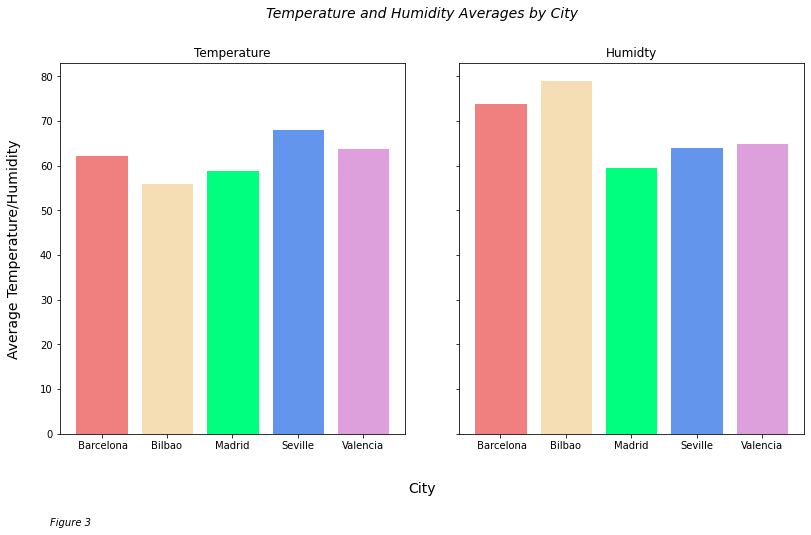

In [24]:
# Slicing and grouping by city name and finding the average of temperature and humidity

temp_var = clean_weather_use[['city_name', 'temp']]
temp_avg = temp_var.groupby('city_name', as_index=False).mean()

humidity_var = clean_weather_use[['city_name', 'humidity']]
humidity_avg = humidity_var.groupby('city_name', as_index=False).mean()

temp_humid = clean_weather_use[['city_name', 'temp', 'humidity']]
temp_humid_avg = temp_humid.groupby('city_name', as_index=False).mean()

# Bar plots for temperature and humidity for each city

fig3, ax = plt.subplots(1, 2, figsize=(12, 7), sharey=True)
temp_humid_color = ['lightcoral', 'wheat', 'springgreen', 'cornflowerblue', '#DDA0DD']

plot = ax.flatten()
temp_humid_label = humidity_avg['city_name'].tolist()
temp_humid_col = ['Temperature', 'Humidty']

ax[0].bar(temp_humid_label, temp_humid_avg['temp'], color=temp_humid_color, edgecolor='white')
ax[1].bar(temp_humid_label, temp_humid_avg['humidity'], color=temp_humid_color, edgecolor='white')

for i in [0, 1]:
    plot[i].set_title(temp_humid_col[i])
    
fig3.tight_layout(pad=5)

fig3.supxlabel('City', fontsize=14)
fig3.supylabel('Average Temperature/Humidity', fontsize=14)

fig3.suptitle('Temperature and Humidity Averages by City', style='italic', fontsize=14)

fig3.text(0.07, -0.05, 'Figure 3', style='italic')

plt.show()

C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/4134151757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_price_demand['year'] = actual_price_demand['time'].dt.year


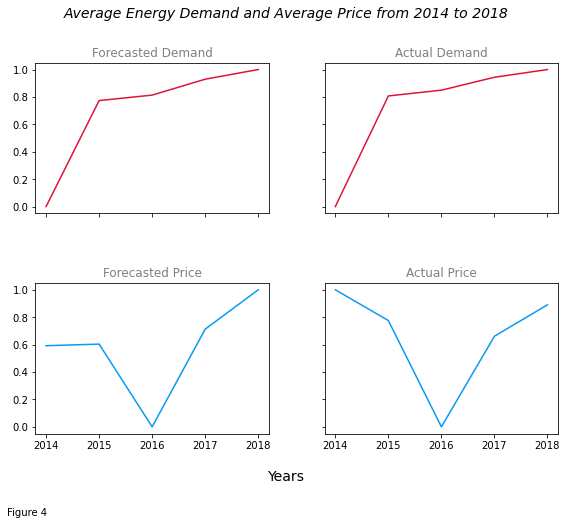

In [25]:
'''
Slicing actual and forecasted price and demand from the energy dataset, grouping by year, calculating the averages,
and normalizing the average values
'''

actual_price_demand = clean_energy_use[['time', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']]
actual_price_demand['year'] = actual_price_demand['time'].dt.year

price_demand_grouped = actual_price_demand.groupby('year', as_index=False).mean()

normalized_price_demand_grouped = (price_demand_grouped.iloc[:,1:5]-price_demand_grouped.iloc[:,1:5].min())/(price_demand_grouped.iloc[:,1:5].max()-price_demand_grouped.iloc[:,1:5].min())
extracted_col = price_demand_grouped['year']
normalized_price_demand_grouped.insert(0, 'year', extracted_col)


# Line chart for average energy demand and price (forecasted and actual)

fig4, subplts = plt.subplots(2, 2, figsize = (9,7), sharex='col', sharey='row')

sub_titles = ['', 'Forecasted Demand', 'Actual Demand', 'Forecasted Price', 'Actual Price']
price_demand_color = ['', '#DC143C', '#DC143C', '#069AF3', '#069AF3']

mysubplts =  subplts.flatten()
cols = normalized_price_demand_grouped.columns

for i in [1,2,3,4]:    
    price_demand_plot = mysubplts[i-1].plot(normalized_price_demand_grouped['year'],
                                            normalized_price_demand_grouped.loc[:,cols[i]], color=price_demand_color[i])
    mysubplts[i-1].set_title(sub_titles[i], color='#808080')

fig4.text(0.5, 0.04, 'Years', ha='center', fontsize = 14)

fig4.tight_layout(pad=5) 
fig4.suptitle('Average Energy Demand and Average Price from 2014 to 2018', style='italic', fontsize=14)

fig4.text(0.1, -0.03, 'Figure 4', ha='center') 

plt.show()


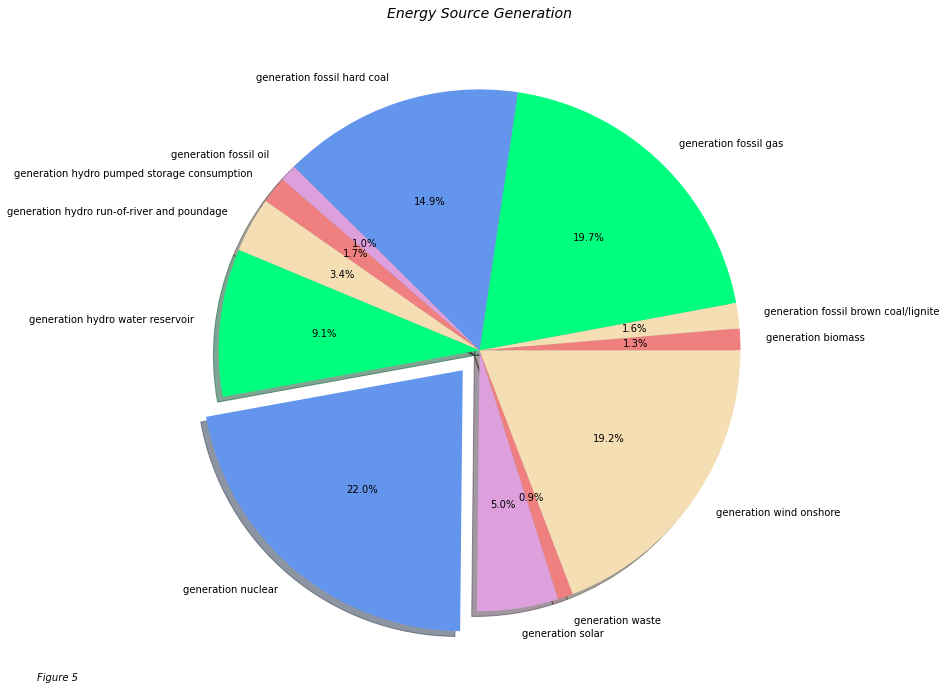

In [26]:
# Plotting energy generation as pie chart

fig5 = plt.figure(figsize=(12,12))
plt.axes(aspect='equal')
energy_source_color = ['lightcoral', 'wheat', 'springgreen', 'cornflowerblue', '#DDA0DD']
column_list = clean_energy.columns.values.tolist()

# Removing columns which are not significant for the pie chart
column_list.remove('time')
column_list.remove('forecast solar day ahead')
column_list.remove('forecast wind onshore day ahead')
column_list.remove('total load forecast')
column_list.remove('total load actual')
column_list.remove('price day ahead')
column_list.remove('price actual')
column_list.remove('generation fossil coal-derived gas')
column_list.remove('generation fossil oil shale')
column_list.remove('generation fossil peat')
column_list.remove('generation geothermal')
column_list.remove('generation marine')
column_list.remove('generation other')
column_list.remove('generation other renewable')
column_list.remove('generation wind offshore')

energy_sum = []

for i in column_list:
  energy_sum.append(clean_energy[i].sum())

explode = (0,0,0,0,0,0,0,0,0.1,0,0,0)

generation_pie = plt.pie(energy_sum, labels=column_list, colors=energy_source_color, autopct='%1.1f%%', explode=explode,
                         shadow=True)

plt.title("Energy Source Generation", style='italic', fontsize=14)

fig5.text(0, 0.12, 'Figure 5', style='italic')

plt.show()

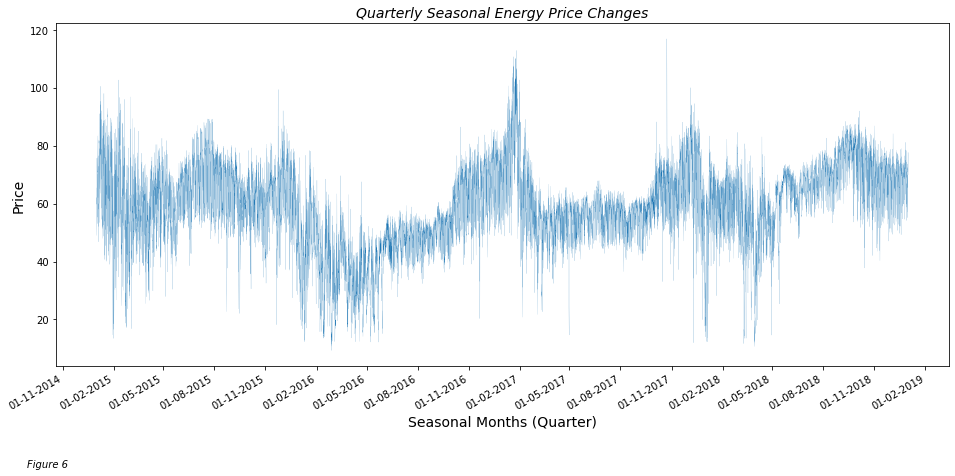

In [27]:
# Line plot of quarterly seasonal energy price changes

fig6 = plt.figure(figsize = (16,7))

plt.plot(clean_energy['time'], clean_energy['price actual'], linewidth=0.1)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.gcf().autofmt_xdate() # Rotation

plt.xlabel("Seasonal Months (Quarter)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Quarterly Seasonal Energy Price Changes", style='italic', fontsize=14)

fig6.text(0.1, 0, 'Figure 6', style='italic')

plt.show()

C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/2826741971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speed['month'] = wind_speed['dt_iso'].dt.month_name(locale = 'English')
C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/2826741971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_generation['month'] = wind_generation['time'].dt.month_name(locale = 'English')


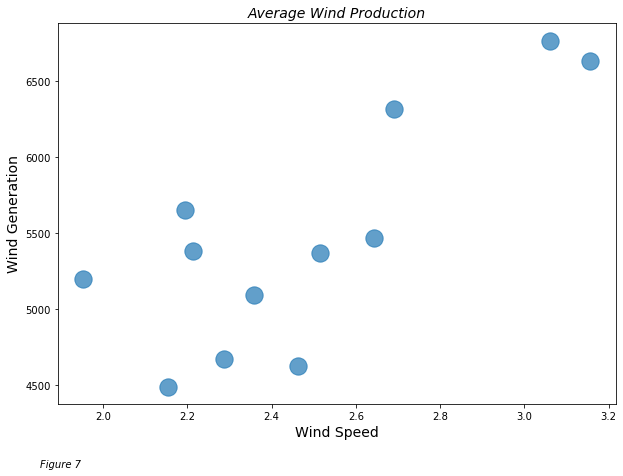

In [28]:
# Slicing time and wind speed and converting time to month
wind_speed = clean_weather_use[['dt_iso','wind_speed']]
wind_speed['month'] = wind_speed['dt_iso'].dt.month_name(locale = 'English')

# Grouping by month and finding average
df1 = wind_speed.drop('dt_iso', axis=1)
weather_wind_speed = df1.groupby('month', as_index=False).mean()

# Slicing time and generation of wind onshore and converting time to month
wind_generation = clean_energy_use[['time', 'generation wind onshore']]
wind_generation['month'] = wind_generation['time'].dt.month_name(locale = 'English')

# Grouping by month and finding average
df2 = wind_generation.drop('time', axis=1)
energy_wind_generation = df2.groupby('month', as_index=False).mean()

# Merging both dataframes otained for a scatter plot
wind_speed_gen = weather_wind_speed.merge(energy_wind_generation, on='month')


''' 
Generating a scatter plot between wind speed and generation of wind onshore to visualize Wind Production 
from January to December in the 2014 to 2018 period.
'''


fig7 = plt.figure(figsize = (10,7))

_=plt.scatter(wind_speed_gen['wind_speed'], wind_speed_gen['generation wind onshore'], alpha=0.7, cmap='winter', s=300)

plt.title('Average Wind Production', style='italic', fontsize=14)
plt.xlabel('Wind Speed', fontsize=14)
plt.ylabel('Wind Generation', fontsize=14)

fig7.text(0.1, 0, 'Figure 7', style='italic')

plt.show()

C:\Users\KENNET~1\AppData\Local\Temp/ipykernel_12724/280929537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['year'] = df_gen['time'].dt.year


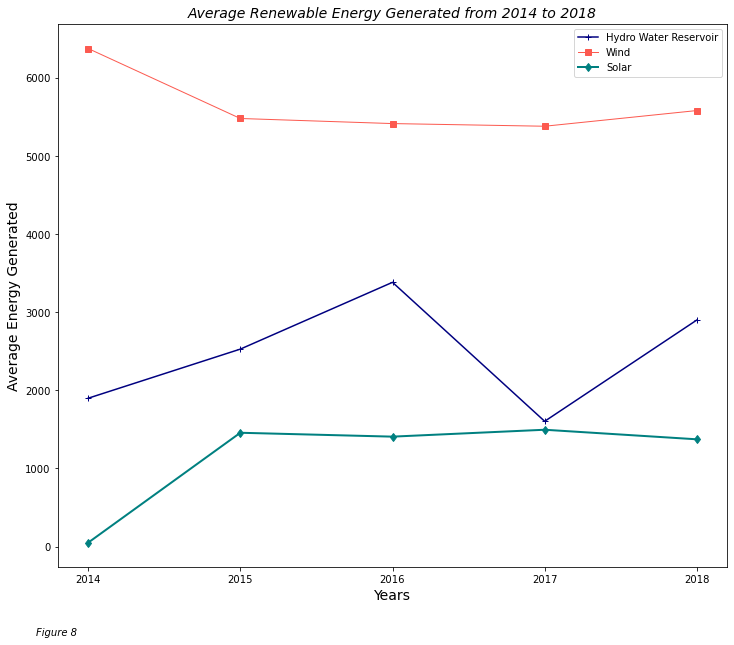

In [29]:
# Slicing generation hydro water reservoir, generation wind onshore, and generation solar and converting time to year
df_gen = clean_energy_use[['time', 'generation hydro water reservoir', 'generation wind onshore', 'generation solar']]
df_gen['year'] = df_gen['time'].dt.year

# Dropping the time column from the dataframe
df3 = df_gen.drop('time', axis=1)

# Grouping by year and finding the average
energy_gen = df3.groupby('year', as_index=False).mean()

# Plotting the line plot
fig8 = plt.figure(figsize=(12,10))

year_index = len(energy_gen)

energy_gen_label = ['2014', '2015', '2016', '2017', '2018']

water, = plt.plot(energy_gen_label, energy_gen['generation hydro water reservoir'], marker='+', color='#000080', linewidth=1.5, label='Hydro Water Reservoir')
wind, = plt.plot(energy_gen_label, energy_gen['generation wind onshore'], marker='s', color='#FC5A50', linewidth=1, label='Wind')
solar, = plt.plot(energy_gen_label, energy_gen['generation solar'], marker='d', color='#008080', linewidth=2.0, label='Solar')

plt.title('Average Renewable Energy Generated from 2014 to 2018', style='italic', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Energy Generated', fontsize=14)

plt.legend(handles=[water, wind, solar], loc="best")

fig8.text(0.1, 0.03, 'Figure 8', style='italic')

plt.show()

# <font color=#FFA500> **5-Questions Asked About the Data and How Visualization Answered the Questions** </font>

On an average, Seville has the highest temperature of about 69 Fahrenheit and Bilbao has the lowest temperature average of about 55 Fahrenheit as shown in figure 3. The average temperatures for Barcelona, Bilbao, Madrid, Seville, and Valencia are close (that is ranging from about 55 Fahrenheit to 69 Fahrenheit). This could imply that the weather may be cold in some seasons and warm/hot in other seasons. Moreover, on average, Bilbao is more humid than the other cities. Madrid is the less humid city.

It was of interest to examine the average energy demand and average prices for the forecasted and actual data from 2014 to 2018. In figure 6, as actual average prices fell sharply from 2014 to 2016, actual demand on average rose sharply and continuoulsly increased at a decreasing rate from 2015 to 2016 despite the rise in actual prices from 2016 to 2018. The forecasted demand and actual demand visual presentation observe the same movement in the line charts. This shows how the forecasted demand is a good representation of the actual demand visually.

From figure 3 which displays the various percentages of the sources of energy in Spain, it can be inferred from the chart which energy source is generated the most. Energy in Spain is largely generated from nuclear. This constitutes 22% of the total energy sources generated in the country. The large dependence on nuclear energy raises questions as global energy systems for renewable energy increase in popularity. Renewable energy sources such as solar in Spain constitutes 5% of energy sources generated. However, a renewable energy source such as wind constitues 19.2% of the total energy sources generated.

To discover how energy prices change seasonally, a line chart from figure 6 that demonstrates the change in prices every quarter from 01-11-2014 to 01-02-2019 was visualized. The chart shows great fluctuations in energy prices. It is seen that energy prices drop in the spring and summer periods and increases in the winter and fall.

Since 19% of Spain's energy is generated by wind as shown in figure 5, it was interesting to find the average wind production between the wind generated and wind speed as shown in figure 7. From figure 7, the highest amount of wind is generated for energy use when wind speed is at its highest. On an average, whenever the wind speed is around 3.1 m/s, the greatest amount of energy amounting to about 6700 MW is produced.

As renewable energy increases in popularity globaly, the eneregy sources in Spain which are renewable were considered visually to identify Spain's dependence on renewable energy from 2014 to 2018 as shown in figure 8. The considered renewable energies were hydro water reservoir, wind, and solar. Spain's dependence on wind as renewable energy is averagely the largest. Despite the fall in energy generated from wind in 2014 to 2015, wind generated for energy in Spain was constant from 2015 to 2018. The least renewable energy Spain depends on for its energy generation is solar. Despite the high  temperatures in Sapin's five cities, energy generated from solar is low. Generation of energy through hydro water reservoir increased from 2014 to 2016. Despite the drastic fall from 2016 to 2017, energy generation from hydro water reservoir averagely increased from 2017 to 2018. Clearly, the use of renewable energy in Spain plays an important part in energy generation for sustainability.


# <font color=#FFA500> **6-Interesting Information Discovered** </font>

One of the first interesting information discovered was how much of its energy Spain generated from renewable sources. Around 61.5% of the total energy generated is generated via renewable sources, which shows that the country is doing its part to combat global warming that it does not have to depend on fosil or gas fuel. This is an important factor considering the war on Ukraine has increased gas prices and that most of Europe receives its gas from Russia. High temperatures and high humidity tend to be correlated as higher humidity levels are usually found in high temperature locations, thus it was interesting to see that this didn't prove true for the data. As seen in figure 1, Barcelona and Bilbao have the lowest temperatures out of the all cities but they have the highest humidity. 

Another interesting discovery regarding the energy price is that the energy price seems to go up between the November of the previous year and start to decrease again around April or May of the next year. In this data, we can see the supply/demand phenomenon. If the supply of energy stays the same, but the demand increases because of winter season (more energy required to heat) there is a higher energy price.


# <font color=#FFA500> **7-Descriptions, Discussions, and Conclusions of Results** </font>

In conclusion, energy and weather datasets obtained from [Kaggle](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=weather_features.csv) were used. The datasets were cleaned for missing values. Columns with only zero values were dropped. From the data and the visuals generated, Spain's biggest cities are mostly powered by renewable energy sources. Energy prices over the 4 years have increased long term. While there are increases and decreases over the 4 years, the price always moved towards average. In addition, more focus was placed on renewable energies. It was discovered that wind energy was the biggest energy producer (if not considering nuclear) which shows that Spain, considering that it is located in the Mediterranean (plenty of water and sun) could make futre investments into solar and hydro power generation opportunities.